# Data Science Masters :Assignment 28


# Problem:
In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

# Solution: 

Importing Libraries...

In [1]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from textblob import TextBlob 
from textblob import Word
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkarthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mkarthikeyan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# loading Data
response = urllib.request.urlopen('http://php.net/') 
html = response.read()

In [3]:
print(html)

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="en">\n<head>\n\n  <meta charset="utf-8">\n  <meta name="viewport" content="width=device-width, initial-scale=1.0">\n\n  <title>PHP: Hypertext Preprocessor</title>\n\n <link rel="shortcut icon" href="http://php.net/favicon.ico">\n <link rel="search" type="application/opensearchdescription+xml" href="http://php.net/phpnetimprovedsearch.src" title="Add PHP.net search">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/releases/feed.php" title="PHP Release feed">\n <link rel="alternate" type="application/atom+xml" href="http://php.net/feed.atom" title="PHP: Hypertext Preprocessor">\n\n <link rel="canonical" href="http://php.net/index.php">\n <link rel="shorturl" href="http://php.net/index">\n <link rel="alternate" href="http://php.net/index" hreflang="x-default">\n\n\n\n<link rel="stylesheet" type="text/css" href="/cached.php?t=1539771603&amp;f=/fonts/Fira/fira.css" media="screen">\n<link rel="styles

In [4]:
#use BeautifulSoup to clean the grabbed text data which is at HTML
soup = BeautifulSoup(html,"html5lib") 
text = soup.get_text(strip=True)
print(text)

PHP: Hypertext PreprocessorDownloadsDocumentationGet InvolvedHelpGetting StartedIntroductionA simple tutorialLanguage ReferenceBasic syntaxTypesVariablesConstantsExpressionsOperatorsControl StructuresFunctionsClasses and ObjectsNamespacesErrorsExceptionsGeneratorsReferences ExplainedPredefined VariablesPredefined ExceptionsPredefined Interfaces and ClassesContext options and parametersSupported Protocols and WrappersSecurityIntroductionGeneral considerationsInstalled as CGI binaryInstalled as an Apache moduleSession SecurityFilesystem SecurityDatabase SecurityError ReportingUsing Register GlobalsUser Submitted DataMagic QuotesHiding PHPKeeping CurrentFeaturesHTTP authentication with PHPCookiesSessionsDealing with XFormsHandling file uploadsUsing remote filesConnection handlingPersistent Database ConnectionsSafe ModeCommand line usageGarbage CollectionDTrace Dynamic TracingFunction ReferenceAffecting PHP's BehaviourAudio Formats ManipulationAuthentication ServicesCommand Line Specific E

In [5]:
#convert that text into tokens by splitting the text
tokens = [t for t in text.split()]
print(tokens)

['PHP:', 'Hypertext', 'PreprocessorDownloadsDocumentationGet', 'InvolvedHelpGetting', 'StartedIntroductionA', 'simple', 'tutorialLanguage', 'ReferenceBasic', 'syntaxTypesVariablesConstantsExpressionsOperatorsControl', 'StructuresFunctionsClasses', 'and', 'ObjectsNamespacesErrorsExceptionsGeneratorsReferences', 'ExplainedPredefined', 'VariablesPredefined', 'ExceptionsPredefined', 'Interfaces', 'and', 'ClassesContext', 'options', 'and', 'parametersSupported', 'Protocols', 'and', 'WrappersSecurityIntroductionGeneral', 'considerationsInstalled', 'as', 'CGI', 'binaryInstalled', 'as', 'an', 'Apache', 'moduleSession', 'SecurityFilesystem', 'SecurityDatabase', 'SecurityError', 'ReportingUsing', 'Register', 'GlobalsUser', 'Submitted', 'DataMagic', 'QuotesHiding', 'PHPKeeping', 'CurrentFeaturesHTTP', 'authentication', 'with', 'PHPCookiesSessionsDealing', 'with', 'XFormsHandling', 'file', 'uploadsUsing', 'remote', 'filesConnection', 'handlingPersistent', 'Database', 'ConnectionsSafe', 'ModeComman

### Frequency Distribution

In [6]:
#calculate the frequency distribution using Python NLTK
freq = nltk.FreqDist(tokens)
#Loop through and print
for key,val in freq.items():
    print(str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
and:80
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
as:2
CGI:1
binaryInstalled:1
an:2
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
with:4
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffe

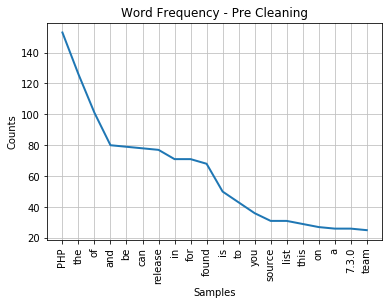

In [7]:
#plot a graph
freq.plot(20, cumulative=False,title='Word Frequency - Pre Cleaning')

### Analyzing Data

In [8]:
# Creating Dataframe..
word_df = pd.DataFrame()
word_df['Word']=freq.keys()
word_df['Count']=freq.values()

In [9]:
# Printing first five rows
word_df.head()

,Word,Count
0,PHP:,1
1,Hypertext,1
2,PreprocessorDownloadsDocumentationGet,1
3,InvolvedHelpGetting,1
4,StartedIntroductionA,1


In [10]:
# Calculating characters length
word_df['charLength'] = word_df['Word'].str.len()
word_df.head(5)

,Word,Count,charLength
0,PHP:,1,4
1,Hypertext,1,9
2,PreprocessorDownloadsDocumentationGet,1,37
3,InvolvedHelpGetting,1,19
4,StartedIntroductionA,1,20


In [11]:
# finding stopwords
stop = stopwords.words('english')
word_df['stopwords'] = word_df['Word'].apply(lambda x: len([x for x in x.split() if x in stop]))
word_df.loc[(word_df.stopwords.values!=0)].head()

,Word,Count,charLength,stopwords
10,and,80,3,1
22,as,2,2,1
25,an,2,2,1
40,with,4,4,1
112,to,43,2,1


In [12]:
# finding Numbers
word_df['Numbers'] = word_df['Word'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
word_df.loc[(word_df.Numbers.values!=0)].head()

,Word,Count,charLength,stopwords,Numbers
256,7,1,1,0,1
434,3,8,1,0,1
441,2,2,1,0,1
446,1,4,1,0,1
472,4,2,1,0,1


In [13]:
# finding special characters
word_df['speicalChar'] = word_df['Word'].apply(lambda x: len([x for x in x.split() if x.endswith(':')]))
word_df.loc[(word_df.speicalChar.values!=0)].head()

,Word,Count,charLength,stopwords,Numbers,speicalChar
0,PHP:,1,4,0,0,1


### Data Pre-Processing

In [14]:
# removing punctuation marks 
word_df['Word'] = word_df['Word'].str.replace('[^\w\s]','')
word_df['speicalChar'] = word_df['Word'].apply(lambda x: len([x for x in x.split() if x.endswith(':')]))
word_df.head(1)

,Word,Count,charLength,stopwords,Numbers,speicalChar
0,PHP,1,4,0,0,0


In [15]:
# converting to lower cases
word_df['Word'] = word_df['Word'].apply(lambda x: " ".join(x.lower() for x in x.split()))
word_df.head()

,Word,Count,charLength,stopwords,Numbers,speicalChar
0,php,1,4,0,0,0
1,hypertext,1,9,0,0,0
2,preprocessordownloadsdocumentationget,1,37,0,0,0
3,involvedhelpgetting,1,19,0,0,0
4,startedintroductiona,1,20,0,0,0


In [16]:
# removing stopwords
word_df['Word'] = word_df['Word'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
word_df.shape

(533, 6)

In [17]:
# Lemmatization -  word into its root word
word_df['Word'] = word_df['Word'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [18]:
#Filtering top words
word_df_top=(word_df.loc[(word_df.Word.values!='')].sort_values(by=['Count'],ascending=False)).head(20)
word_df_top

,Word,Count,charLength,stopwords,Numbers,speicalChar
136,php,153,3,0,0,0
202,release,77,7,0,0,0
187,found,68,5,0,0,0
177,source,31,6,0,0,0
190,list,31,4,0,0,0
250,730,26,5,0,0,0
178,downloads,25,9,0,0,0
179,please,25,6,0,0,0
157,team,25,4,0,0,0
180,visit,25,5,0,0,0


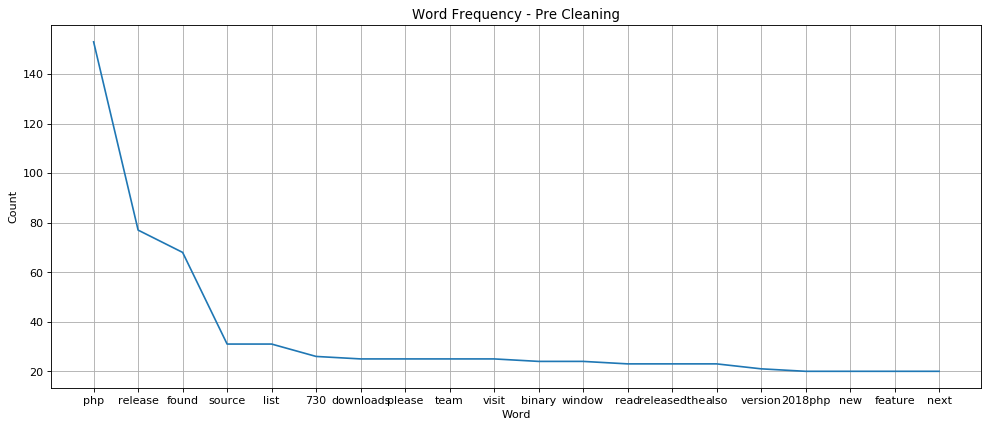

In [19]:
# plot a graph - cleaned data
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(word_df_top.Word.values, word_df_top.Count.values)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Frequency - Pre Cleaning')
plt.grid()
plt.show()

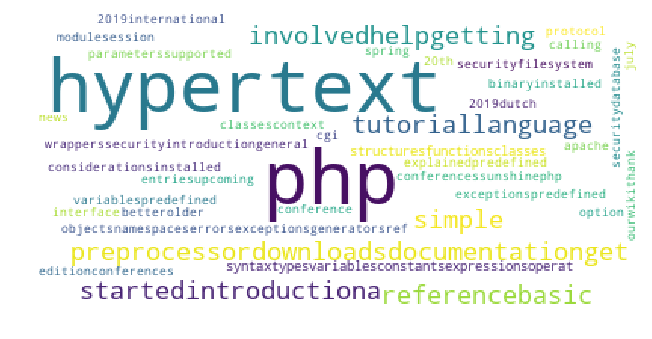

In [22]:
# Word Cloud Visulaization 
from matplotlib.pyplot import figure
figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='k')
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=40,
                          max_font_size=50, 
                          random_state=0
                         ).generate(str(word_df['Word']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()